In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('data/train.csv')
df_users = pd.read_csv('data/users.csv')
df_test = pd.read_csv('data/test.csv')

df_train = df_train.merge(df_users, on='user_id')
df_test = df_test.merge(df_users, on='user_id',how='left')

In [3]:
print("Unique Users: ",len(df_train['user_id'].unique()))
print("Entries: ",len(df_train))

Unique Users:  72845
Entries:  73539


Hypothesis is that domain is not really a big factor

In [4]:
df_train.groupby('domain').mean().reset_index()['open_flag']

0     0.185185
1     0.141280
2     0.304882
3     0.305239
4     0.295858
5     0.223938
6     0.248521
7     0.207547
8     0.181046
9     0.180412
10    0.316097
Name: open_flag, dtype: float64

In [5]:
pd.get_dummies(df_train['domain'])

,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
73534,0,0,1,0,0,0,0,0,0,0,0
73535,0,1,0,0,0,0,0,0,0,0,0
73536,0,1,0,0,0,0,0,0,0,0,0
73537,0,1,0,0,0,0,0,0,0,0,0


Convert values to numeric

In [6]:
df_train['grass_date'] = df_train['grass_date'].apply(lambda x: pd.to_datetime(x))

In [7]:
train_cols = ['country_code', 'subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days', 'row_id', 'attr_1',
       'attr_2', 'attr_3', 'age']

def quick_convert_numeric(x):
    try:
        return float(x)
    except ValueError:
        return -1

for col in train_cols:
    df_train[col] = df_train[col].apply(lambda x: quick_convert_numeric(x))
    df_test[col] = df_test[col].apply(lambda x: quick_convert_numeric(x))

In [8]:
open_cols = ['last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'open_count_last_30_days',
       'open_count_last_60_days', 'login_count_last_10_days',
       'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days',
       'checkout_count_last_60_days']
open_cols_bool = []
for col in open_cols:
    df_train[col+'_bool'] = np.where(df_train[col]==-1,0,1)
    df_test[col+'bool'] = np.where(df_test[col]==-1,0,1)
    open_cols_bool.append(col+'bool')

In [9]:
df_train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,last_checkout_day_bool,open_count_last_10_days_bool,open_count_last_30_days_bool,open_count_last_60_days_bool,login_count_last_10_days_bool,login_count_last_30_days_bool,login_count_last_60_days_bool,checkout_count_last_10_days_bool,checkout_count_last_30_days_bool,checkout_count_last_60_days_bool
0,4.0,2019-07-16 00:00:00+08:00,43,44.0,19.0,6.0,18.0,0.0,2.0,4.0,...,1,1,1,1,1,1,1,1,1,1
1,4.0,2019-07-16 00:00:00+08:00,102,44.0,9.0,4.0,8.0,2.0,9.0,17.0,...,1,1,1,1,1,1,1,1,1,1
2,6.0,2019-07-16 00:00:00+08:00,177,49.0,14.0,5.0,5.0,0.0,4.0,12.0,...,1,1,1,1,1,1,1,1,1,1
3,1.0,2019-07-16 00:00:00+08:00,184,49.0,49.0,9.0,53.0,0.0,0.0,1.0,...,1,1,1,1,1,1,1,1,1,1
4,6.0,2019-07-16 00:00:00+08:00,221,49.0,227.0,6.0,221.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6.0,2019-09-02 00:00:00+08:00,127613,39.0,24.0,36.0,279.0,0.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
73535,2.0,2019-09-02 00:00:00+08:00,127620,38.0,46.0,10.0,51.0,0.0,0.0,1.0,...,1,1,1,1,1,1,1,1,1,1
73536,2.0,2019-09-02 00:00:00+08:00,127696,32.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,0,1,1,1,1,1,1,1,1,1
73537,2.0,2019-09-02 00:00:00+08:00,127807,38.0,5.0,34.0,-1.0,2.0,4.0,4.0,...,0,1,1,1,1,1,1,1,1,1


## Random Forest Approach

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(df_train[train_cols+open_cols].fillna(-1), df_train['open_flag'], test_size=0.33)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

0.8898549530245591

In [63]:
preds = rf.predict(df_test[train_cols+open_cols].fillna(-1))
df_test['preds'] = preds

In [64]:
df_res = df_test.reset_index()[['index','preds']]
df_res.columns = ['row_id','open_flag']

In [66]:
df_res['open_flag'].value_counts()

0    51355
1     4615
Name: open_flag, dtype: int64

In [67]:
df_res.to_csv('rf_test.csv',index=False)

## Neural Network Approach

In [81]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


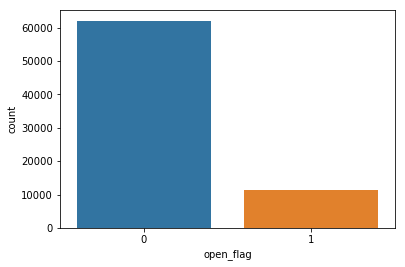

In [11]:
import seaborn as sns
sns.countplot(x='open_flag', data=df_train)

In [154]:
import torch.nn as nn
import torch.nn.functional as F
#our class must extend nn.Module
class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier,self).__init__()
        #Our network consists of 3 layers. 1 input, 1 hidden and 1 output layer
        #This applies Linear transformation to input data. 
        self.fc1 = nn.Linear(len(train_cols+open_cols),64)
        
        #This applies linear transformation to produce output data
        self.fc2 = nn.Linear(64,2)
        
    #This must be implemented
    def forward(self,x):
        #Output of the first layer
        x = self.fc1(x)
        #Activation function is Relu. Feel free to experiment with this
        x = torch.tanh(x)
        #This produces output
        x = self.fc2(x)
        return x
        
    #This function takes an input and predicts the class, (0 or 1)        
    def predict(self,x):
        #Apply softmax to output. 
        pred = F.softmax(self.forward(x))
        ans = []
        #Pick the class with maximum weight
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [155]:
import torch
#Initialize the model        
model = MyClassifier()
#Define loss criterion
criterion = nn.CrossEntropyLoss()
#Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(
    scaler.fit_transform(df_train[train_cols+open_cols]), np.array(df_train['open_flag']), test_size=0.33, random_state=69)


In [125]:
X = torch.from_numpy(np.array(X_train)).type(torch.FloatTensor)
y = torch.from_numpy(np.array(y_train)).type(torch.LongTensor)

In [126]:
X_val = torch.from_numpy(np.array(X_test)).type(torch.FloatTensor)
y_val = torch.from_numpy(np.array(y_test)).type(torch.LongTensor)

In [109]:
X_val.shape

torch.Size([24268, 31])

In [157]:
#Number of epochs
epochs = 5
#List to store losses
losses = []

for i in range(epochs):
    #Precit the output for Given input
    y_pred = model.forward(X)
    print(y_pred)
    #Compute Cross entropy loss
    loss = criterion(y_pred,y)
    print(loss)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()

tensor([[    nan,     nan],
        [ 0.0528,  0.4209],
        [-0.0962, -0.1296],
        ...,
        [    nan,     nan],
        [-0.3396,  0.1069],
        [-0.1569,  0.0146]], grad_fn=<AddmmBackward>)
tensor(nan, grad_fn=<NllLossBackward>)
tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]], grad_fn=<AddmmBackward>)
tensor(nan, grad_fn=<NllLossBackward>)
tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]], grad_fn=<AddmmBackward>)
tensor(nan, grad_fn=<NllLossBackward>)
tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]], grad_fn=<AddmmBackward>)
tensor(nan, grad_fn=<NllLossBackward>)
tensor([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]], grad_fn=<AddmmBackward>)
t

In [111]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X_val),y_val))

C:\Users\yu.an\AppData\Local\Continuum\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.1565023899785726


In [53]:
model.predict(X_val).numpy().sum()

C:\Users\yu.an\AppData\Local\Continuum\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


24268

In [55]:
y_val.numpy().sum()

3798

## LGBM

In [24]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(
    df_train[train_cols+open_cols], df_train['open_flag'], test_size=0.33, random_state=69)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [130]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_model.score(X_test, y_test)

0.8905966705126092

In [131]:
df_test['preds'] = lgb_model.predict(df_test[train_cols+open_cols], num_iteration=clf.best_iteration)

In [133]:
df_test['preds'].value_counts()

0    51242
1     4728
Name: preds, dtype: int64

In [120]:
df_res['open_flag'].value_counts()

0    51355
1     4615
Name: open_flag, dtype: int64

In [134]:
df_lgbm = df_test.reset_index()[['index','preds']]
df_lgbm.columns = ['row_id','open_flag']
df_lgbm.to_csv('lgbm_test1.csv',index=False)